## OneSample

### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [3]:
data = np.genfromtxt('../../data/simple_data.csv', delimiter=',')
print(data)

[[6.7 9.1]
 [4.6 5.9]
 [3.5 4.6]
 [5.5 6.7]]


areas:  [6.7 4.6 3.5 5.5]
prices:  [9.1 5.9 4.6 6.7]
data size:  4


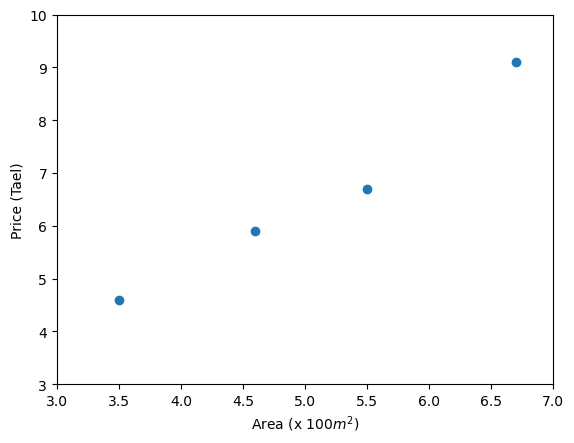

In [4]:
areas = data[:, 0]
prices = data[:, 1]
N = len(areas)

print("areas: ", areas)
print("prices: ", prices)
print("data size: ", N)

# plot the data
plt.scatter(areas, prices)
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.xlim(3,7)
plt.ylim(3, 10)
plt.show()

### Training function

In [5]:
# forward
def predict(x, w, b):
    return w * x + b

def compute_gradient(x, y, y_hat):
    dw = 2 * x * (y_hat - y)
    db = 2 * (y_hat - y)

    return (dw, db)

def update_weight(w, b, dw, db, lr=0.001):
    w = w - lr * dw
    b = b - lr * db

    return (w, b)

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

### Training process

In [7]:
# init weights
b = 0.04
w = -0.34
lr = 0.02

# parameter
epochs = 10
losses = [] # for debug
losses_all_epochs = []

for epoch in range(epochs):
    epoch_loss = []
    # for each epoch
    for i in range(N):
        x = areas[i]
        y = prices[i]

        y_hat = predict(x, w, b)

        loss = compute_loss(y_hat, y)
        epoch_loss.append(loss)
        losses_all_epochs.append(loss)
        print(loss)

        dw, db = compute_gradient(x, y, y_hat)
        w, b = update_weight(w, b, dw, db, lr)
    # loss for each epoch
    mean_loss = np.sum(epoch_loss) / len(epoch_loss)
    losses.append(mean_loss)



128.550244
49.09813868964093
0.2978666638171294
0.6761546819648765
1.4961961729515123
1.2421558961808372
0.0005958270445172143
0.20619980459758444
1.227290769192806
1.0862982111039632
0.00020202921498897256
0.20772372381330653
1.2206101856626983
1.072086600947402
9.585957527677484e-05
0.21303364196383398
1.2167572802447408
1.0595691504116764
2.984811025072228e-05
0.2184154503006066
1.2129687722154336
1.047230121315139
1.36272760749999e-06
0.22382593527869668
1.2092133726087544
1.0350504441855346
9.598186231460192e-06
0.22926347757442328
1.2054904186072315
1.02302778720548
5.377644012572535e-05
0.23472695224819373
1.2017995942617465
1.0111600347032241
0.00013313238164334098
0.24021526082354577
1.1981405908472518
0.9994451022376798
0.0002469135567324983
0.24572732563292451


In [8]:
print(losses)

[np.float64(44.65560100885573), np.float64(0.7362869251936127), np.float64(0.6303786833312662), np.float64(0.6264565720373027), np.float64(0.6236929322668185), np.float64(0.6210065478842193), np.float64(0.618384223138736), np.float64(0.6158247336252578), np.float64(0.6133270055425399), np.float64(0.6108899830686473)]


In [9]:
# get result
print(w, b)

1.192491163985917 0.017371370027855694


### Loss visualization

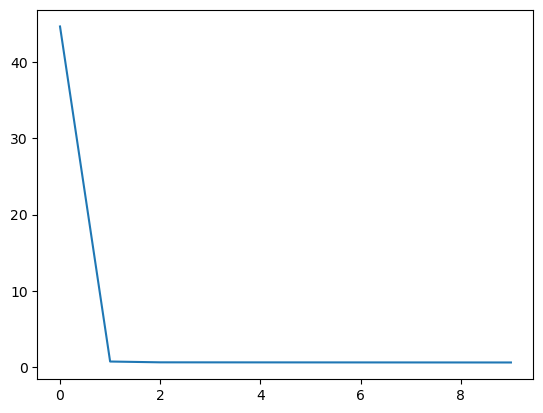

In [ ]:
# Loss reduce through epochs
plt.plot(losses)

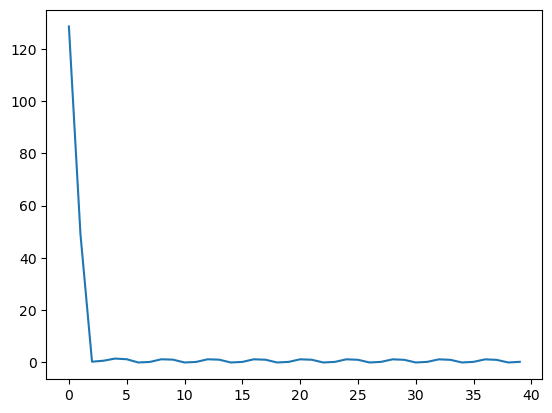

In [ ]:
# Loss reduce through training process
plt.plot(losses_all_epochs)

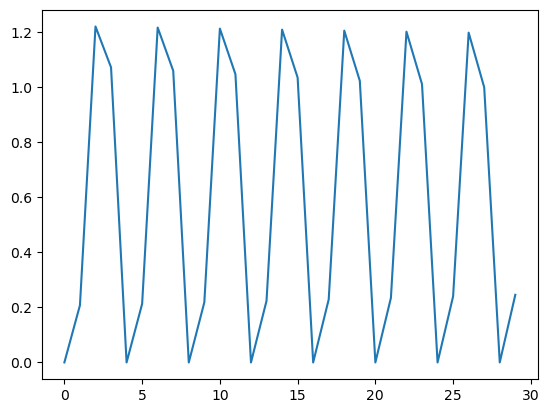

In [30]:
# check the from All elements of losses starting from index 10 to the end
plt.plot(losses_all_epochs[10:])

Conlusion:

## NSamples batch

### Import libraries, load data
Using the same data with `One Sample` section

### Training function
Training function same as `One Sample` section

### Training process

In [ ]:
# init weights
b = 0.04
w = -0.34
lr = 0.02

# parameter
epochs = 10
losses = [] # for debug

for epoch in range(epochs):
    epoch_loss = []
    (dw_total, db_total) = (0, 0)
    # for each epoch
    for i in range(N):
        x = areas[i]
        y = prices[i]

        y_hat = predict(x, w, b)

        loss = compute_loss(y_hat, y)
        epoch_loss.append(loss)


        dw, db = compute_gradient(x, y, y_hat)
        # accumulate
        dw_total = dw_total + dw
        db_total = db_total + db

    # Update weight for each epoch
    w, b = update_weight(w, b, dw_total/N, db_total/N, lr)

    # loss for each epoch
    mean_loss = np.sum(epoch_loss) / len(epoch_loss)
    losses.append(mean_loss)



In [16]:
print(w, b)

1.2391857387770338 0.3211880373107063


### Loss visualization

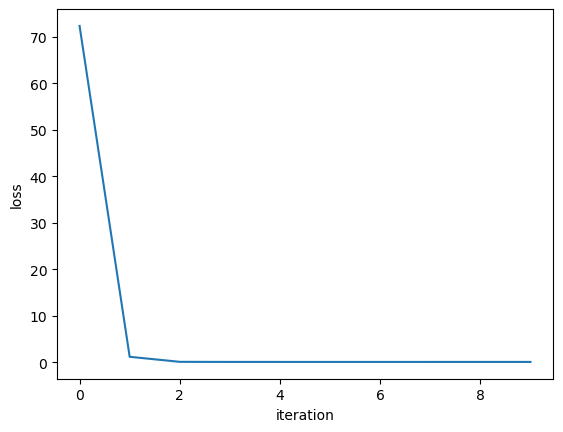

In [ ]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

Text(0.5, 1.0, 'Mean Squared Error (Batch)')

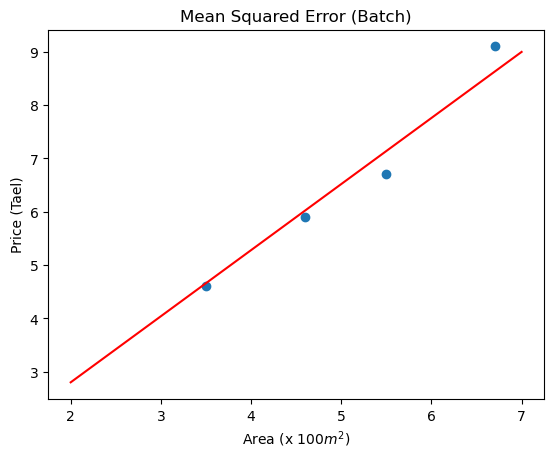

In [21]:
x_data = range(2, 8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')

areas  = data[:, 0]
prices = data[:, 1]
plt.scatter(areas, prices)
#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Squared Error (Batch)')

## DataOutliers

### Import libraries and load data

areas: [6.7 4.6 3.5 5.5 4. ]
prices: [8.6 5.9 4.6 6.7 7.2]
data_size: 5


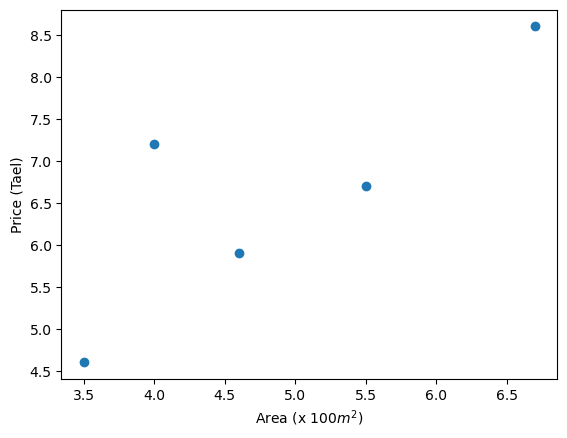

In [32]:
data = np.genfromtxt('../../data/data_outlier.csv', delimiter=',')

areas  = data[:, 0]
prices = data[:, 1]
N = len(areas)

print(f'areas: {areas}')
print(f'prices: {prices}')
print(f'data_size: {N}')

plt.scatter(areas, prices)
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.show()

### Training function
Using the same function as `One Sample` section

### Training process

In [33]:
# init weights
b = 0.04
w = -0.34
lr = 0.01

# parameter
epochs = 10
losses = [] # for debug

for epoch in range(epochs):
    epoch_loss = []
    # for each epoch
    for i in range(N):
        x = areas[i]
        y = prices[i]

        y_hat = predict(x, w, b)

        loss = compute_loss(y_hat, y)
        epoch_loss.append(loss)

        dw, db = compute_gradient(x, y, y_hat)
        w, b = update_weight(w, b, dw, db, lr)
    # loss for each epoch
    mean_loss = np.sum(epoch_loss) / len(epoch_loss)
    losses.append(mean_loss)



In [34]:
print(w, b)

1.339702539241336 0.4438013129971521


### Loss visualization

Text(0.5, 1.0, 'Mean Squared Error')

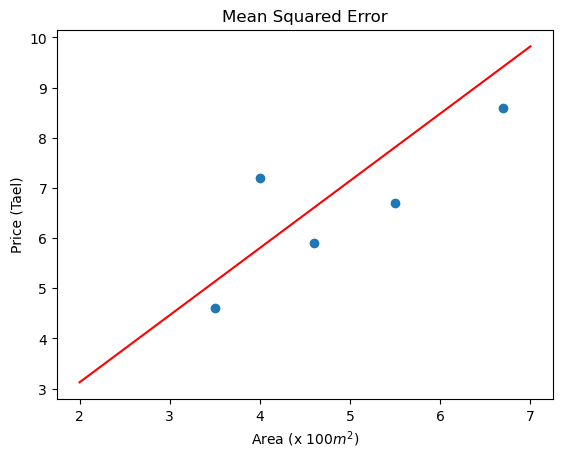

In [36]:
x_data = range(2, 8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')

plt.scatter(areas, prices)
#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Squared Error')

## DataOutliers batch

### Load data
- Continue using outliers data
- Continue import the same libraries and training function as above

### Training process

In [37]:
# init weights
b = 0.04
w = -0.34
lr = 0.01

# parameter
epochs = 20
losses = [] # for debug

for epoch in range(epochs):
    epoch_loss = []
    (dw_total, db_total) = (0, 0)
    # for each epoch
    for i in range(N):
        x = areas[i]
        y = prices[i]

        y_hat = predict(x, w, b)

        loss = compute_loss(y_hat, y)
        epoch_loss.append(loss)

        dw, db = compute_gradient(x, y, y_hat)
        dw_total = dw_total + dw
        db_total = db_total + db

    w, b = update_weight(w, b, dw_total / N, db_total / N, lr)

    # loss for each epoch
    mean_loss = np.sum(epoch_loss) / len(epoch_loss)
    losses.append(mean_loss)



In [38]:
print(w, b)

1.2620867068743564 0.38661908080862684


### Loss visualization

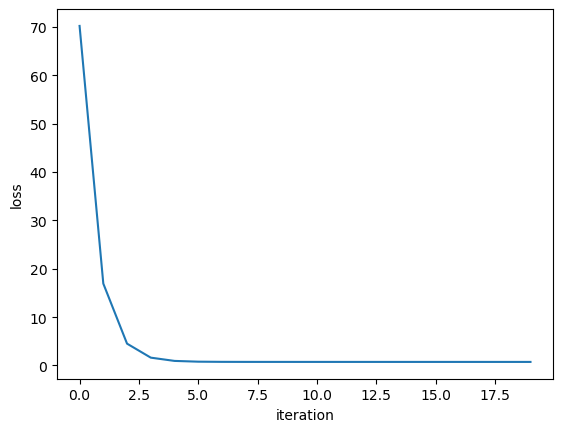

In [ ]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

Text(0.5, 1.0, 'Mean Squared Error')

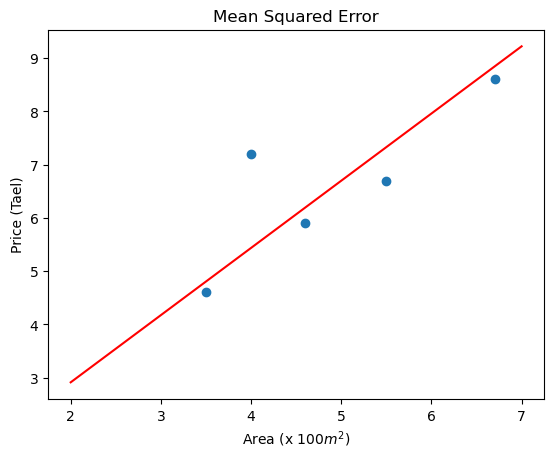

In [40]:
x_data = range(2, 8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')


plt.scatter(areas, prices)
#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Squared Error')